In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from sklearn.preprocessing import LabelEncoder
# Specify the path to your CSV file
csv_file_path = '/Users/luudu/Downloads/archive/melee_player_database/sets.csv'
csv_file_path_clean = '/Users/luudu/Downloads/archive/melee_player_database/sets_cleaned.csv'
csv_file_path_clean_num = '/Users/luudu/Downloads/sets_cleaned_2/sets_cleaned_num.csv'
df = pd.read_csv(csv_file_path_clean_num )
print(csv_file_path_clean_num)


/Users/luudu/Downloads/sets_cleaned_2/sets_cleaned_num.csv


In [33]:
df

,tournament_key,player_id,opponent_id,location_names,bracket_name,bracket_order,set_order,best_of,stage,win_status,player_char,opponent_char
0,5980,3,23,32,318,2,99,1,1,win,8,17
1,5980,3,23,32,318,2,99,1,29,win,8,17
2,5980,3,23,32,318,2,99,1,29,win,8,17
3,5980,12,28,32,318,2,153,1,6,win,1,17
4,5980,21,779,32,318,2,207,1,1,win,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...
1083296,3725,10032,8372,14,22,0,315,1,22,win,13,23
1083297,3725,10032,8372,14,22,0,315,1,1,lose,13,4
1083298,3725,10032,8372,14,22,0,315,1,9,lose,13,4
1083299,3725,10032,8372,14,22,0,315,1,9,win,13,4


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder,StandardScaler
import seaborn as sns

In [35]:
X = df.drop('win_status', axis=1)
y = df['win_status']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train


,tournament_key,player_id,opponent_id,location_names,bracket_name,bracket_order,set_order,best_of,stage,player_char,opponent_char
939124,4483,3333,19965,32,177,0,126,1,22,21,17
279871,2806,2625,2456,37,169,0,334,1,1,4,23
99695,8752,3610,3156,37,22,0,103,1,1,13,4
417339,5113,5669,7509,7,22,0,130,1,29,23,4
672931,2750,5256,2068,15,22,0,348,2,22,17,23
...,...,...,...,...,...,...,...,...,...,...,...
110268,7820,780,4367,32,22,0,315,1,1,1,11
259178,3580,3230,6175,37,22,0,346,1,7,5,8
131932,6469,5519,12615,7,177,0,115,1,22,4,5
671155,5370,4630,13105,7,22,0,107,1,1,22,4


In [37]:
#Initialize decision tree model
dt_classifier_data = DecisionTreeClassifier(random_state=42)

In [38]:
# Train the model on 'data'
dt_classifier_data.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [39]:
# Predictions for 'data'
y_pred_data = dt_classifier_data.predict(X_test)

# Evaluating the model on 'data'
accuracy_dt_data = accuracy_score(y_test, y_pred_data)
classification_rep_dt_data = classification_report(y_test, y_pred_data)
#Accuracy for decision tree
accuracy_dt_data

0.6496877610645202

In [40]:
print(classification_rep_dt_data)

              precision    recall  f1-score   support

        lose       0.52      0.55      0.54     79876
         win       0.73      0.71      0.72    136785

    accuracy                           0.65    216661
   macro avg       0.63      0.63      0.63    216661
weighted avg       0.65      0.65      0.65    216661



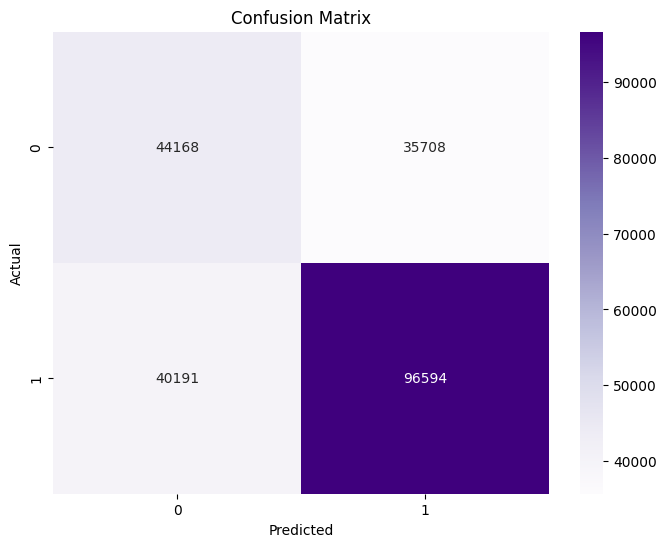

In [41]:
import matplotlib.pyplot as plt
cm =confusion_matrix(y_test, y_pred_data)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="g", cmap="Purples", cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [61]:
# Predictions
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


In [62]:
#Accuracy for random Forest
print(classification_rep)

              precision    recall  f1-score   support

        lose       0.60      0.51      0.55     79876
         win       0.74      0.80      0.77    136785

    accuracy                           0.70    216661
   macro avg       0.67      0.66      0.66    216661
weighted avg       0.69      0.70      0.69    216661



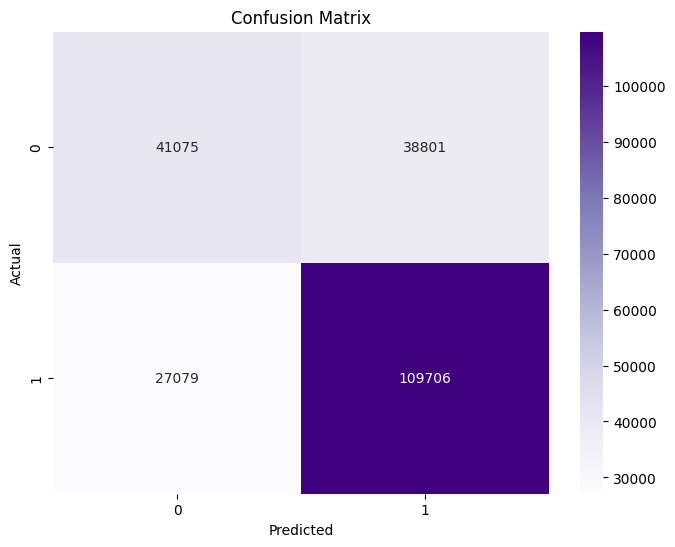

In [45]:
cm =confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="g", cmap="Purples", cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [46]:
print(classification_rep)

              precision    recall  f1-score   support

        lose       0.60      0.51      0.55     79876
         win       0.74      0.80      0.77    136785

    accuracy                           0.70    216661
   macro avg       0.67      0.66      0.66    216661
weighted avg       0.69      0.70      0.69    216661



In [47]:
from sklearn.neural_network import MLPClassifier

In [59]:
# Transform the data into an array for ANN reading
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


In [49]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
# ANN model
ann_model = MLPClassifier(random_state=42)
ann_model.fit(X_train_scaled, y_train_encoded)

MLPClassifier(random_state=42)

In [51]:
# Predictions
ann_predictions = ann_model.predict(X_test_scaled)

In [52]:
# Evaluation
ann_accuracy = accuracy_score(y_test_encoded, ann_predictions)
ann_report = classification_report(y_test_encoded, ann_predictions)
ann_accuracy
print( ann_report)

              precision    recall  f1-score   support

           0       0.54      0.18      0.27     79876
           1       0.65      0.91      0.76    136785

    accuracy                           0.64    216661
   macro avg       0.60      0.54      0.51    216661
weighted avg       0.61      0.64      0.58    216661



In [53]:
classification_rep = classification_report(y_test_encoded, ann_predictions)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.54      0.18      0.27     79876
           1       0.65      0.91      0.76    136785

    accuracy                           0.64    216661
   macro avg       0.60      0.54      0.51    216661
weighted avg       0.61      0.64      0.58    216661



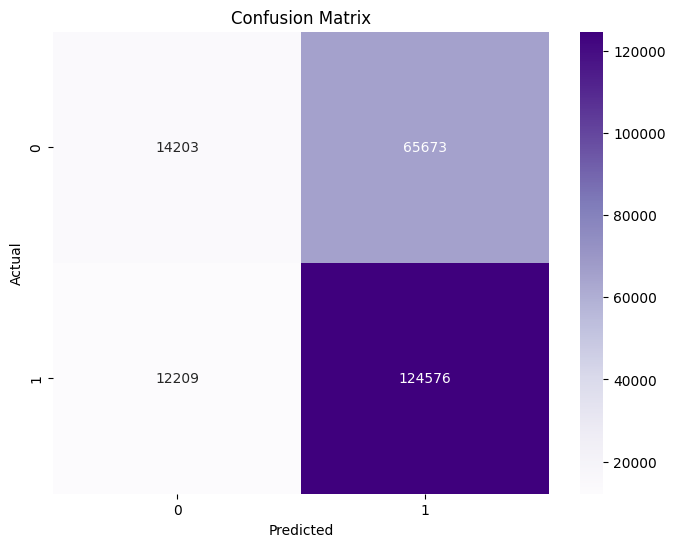

In [54]:
cm =confusion_matrix(y_test_encoded, ann_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="g", cmap="Purples", cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()